<a href="https://colab.research.google.com/github/MohamedAchraf/CNN_with_KERAS/blob/main/Cifar10_NO_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [3]:
print("x_train shape =" , x_train.shape)
print("y_train shape =" , y_train.shape)

print("\nx_test shape =" , x_test.shape)
print("x_test shape =" , x_test.shape)

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)

x_test shape = (10000, 32, 32, 3)
x_test shape = (10000, 32, 32, 3)


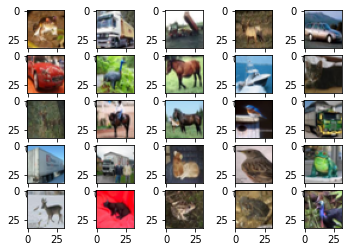

In [4]:
figure = plt.figure()

for i in range(25):
  figure.add_subplot(5, 5, i+1)
  plt.imshow(x_train[i])

plt.show()

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
x_train_mean = np.mean(x_train, axis=(0,1,2))
x_train_std = np.std(x_train, axis=(0,1,2))
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

In [7]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.1),


              tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.2),

              tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),

              tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Dropout(0.3),


              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(512, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [8]:
nb_epochs = 100
print("Total params : ", model.count_params())

Total params :  5483914


In [9]:
def scheduler(epoch, lr):
  print("lr = %0.6f " % lr)
  if epoch / nb_epochs <= 0.5 :
    return lr
  else:
    return lr * tf.math.exp(-0.1)

LearningRate = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [10]:
history = model.fit(x_train, y_train, batch_size=128, epochs=nb_epochs, verbose=1, callbacks=[LearningRate], validation_split=0.2)

Epoch 1/100
lr = 0.001000 
313/313 [==============================] - 13s 31ms/step - loss: 2.0842 - accuracy: 0.1832 - val_loss: 2.0397 - val_accuracy: 0.2060
Epoch 2/100
lr = 0.001000 
313/313 [==============================] - 9s 28ms/step - loss: 1.7272 - accuracy: 0.3166 - val_loss: 1.5188 - val_accuracy: 0.4151
Epoch 3/100
lr = 0.001000 
313/313 [==============================] - 9s 28ms/step - loss: 1.5798 - accuracy: 0.3917 - val_loss: 1.3965 - val_accuracy: 0.4691
Epoch 4/100
lr = 0.001000 
313/313 [==============================] - 9s 28ms/step - loss: 1.4647 - accuracy: 0.4459 - val_loss: 1.2966 - val_accuracy: 0.4952
Epoch 5/100
lr = 0.001000 
313/313 [==============================] - 9s 28ms/step - loss: 1.3949 - accuracy: 0.4787 - val_loss: 1.2526 - val_accuracy: 0.5175
Epoch 6/100
lr = 0.001000 
313/313 [==============================] - 9s 28ms/step - loss: 1.3266 - accuracy: 0.5126 - val_loss: 1.1561 - val_accuracy: 0.5525
Epoch 7/100
lr = 0.001000 
313/313 [=========

In [14]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 2s 7ms/step - loss: 0.5558 - accuracy: 0.8222
Accuracy = 82.22 %


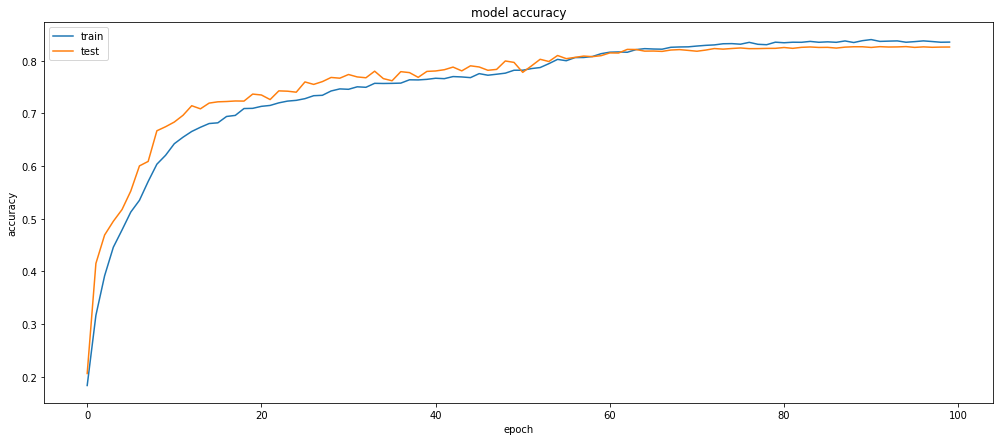

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

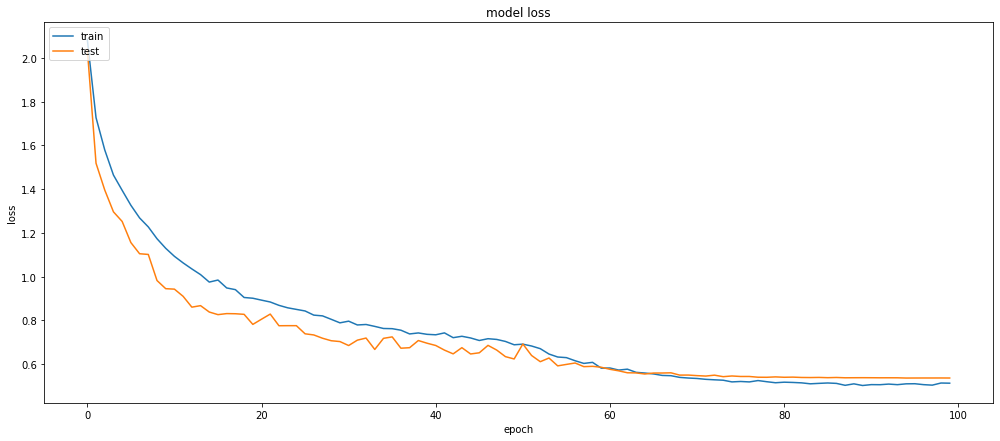

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()